<a href="https://colab.research.google.com/github/thomi137/colab/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 50.8MB/s 
     |████████████████████████████████| 3.8MB 38.8MB/s 
     |████████████████████████████████| 450kB 58.1MB/s 


In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [9]:
mnist = tf.keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

print('X_train shape: {}'.format(X_train.shape))

X_train shape: (60000, 28, 28)


In [0]:
# model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [38]:
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2968 - accuracy: 0.9143 - val_loss: 0.1368 - val_accuracy: 0.9596
Epoch 2/20
60000/60000 [==============================] - 6s 99us/sample - loss: 0.1446 - accuracy: 0.9565 - val_loss: 0.1093 - val_accuracy: 0.9660
Epoch 3/20
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1099 - accuracy: 0.9669 - val_loss: 0.0899 - val_accuracy: 0.9727
Epoch 4/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0888 - accuracy: 0.9726 - val_loss: 0.0774 - val_accuracy: 0.9756
Epoch 5/20
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0753 - accuracy: 0.9766 - val_loss: 0.0783 - val_accuracy: 0.9773
Epoch 6/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0661 - accuracy: 0.9792 - val_loss: 0.0786 - val_accuracy: 0.9760
Epoch 7/20
60000/60000 [==============================

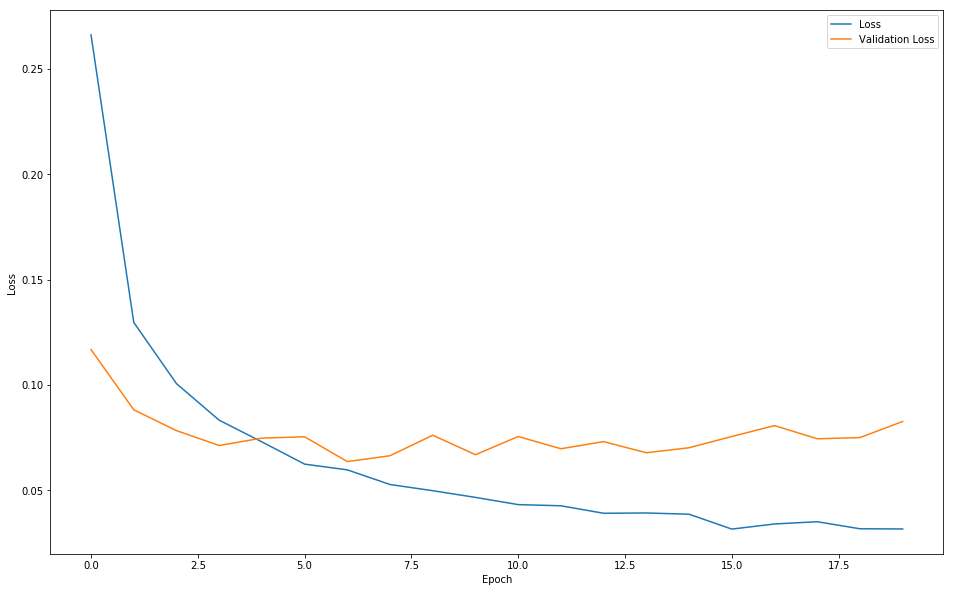

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

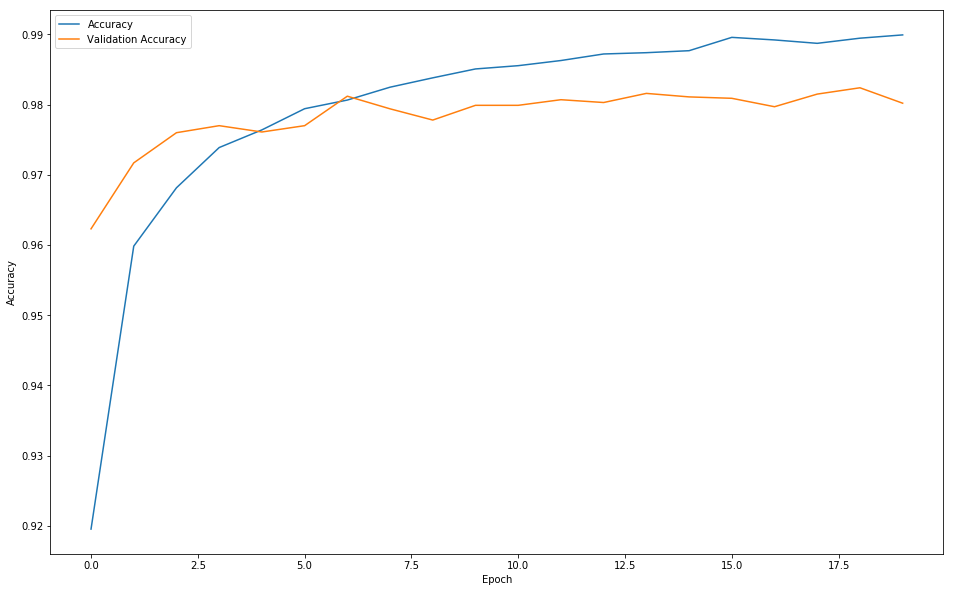

In [35]:
plt.figure(figsize=(16,10))
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();